<a href="https://colab.research.google.com/github/mcldwitt/workshops/blob/main/Reinforcement_learning_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkorange'> Welcome to the reinforcement learning workshop!

To run a cel click on the play button next to it

<font color='red'>do not forget to run the first cell!</font> This will import all the necesary functions and modules.  
This should take about 45 seconds to one minute.

In [ ]:
!pip install gym
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay==0.2.*

import gym
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from base64 import b64encode
def render_mp4(videopath: str) -> str:
  """
  Gets a string containing a b4-encoded version of the MP4 video
  at the specified path.
  """
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'

from pyvirtualdisplay import Display
from IPython.display import HTML

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# <font color='deeppink'> Here, we are creating the environment to work with.</font>  
More documentation on the environment can be found here:  
https://www.gymlibrary.dev/environments/classic_control/cart_pole/



In [ ]:
env = gym.make("CartPole-v1")

# <font color='deeppink'> Let's have a first try at manipulating the environment.</font>   
With the function `env.action_space.sample()` the environment will randomly choose to push the cart to the left or to the right. 

In [ ]:
env.reset()

for i in range(20):

  # env.action_space.sample() produces either 0 (left) or 1 (right).
  observation, reward, done, info = env.step(env.action_space.sample())

  print("step", i, observation, reward, done, info)

env.close()

This results in the printed states, however this is not that interpretable,  
so we are going to take a video of the training process and see what happens. 

In [ ]:
display = Display(visible=False, size=(1400, 900))
_ = display.start()
before_training = "before_training.mp4"


video = VideoRecorder(env, before_training)
# returns an initial observation
env.reset()
for i in range(200):
  # rendering and capturing the environment
  env.render()
  video.capture_frame()

  # env.action_space.sample() produces either 0 (left) or 1 (right).
  observation, reward, done, info = env.step(env.action_space.sample())


video.close()
env.close()

In [ ]:
html = render_mp4(before_training)
HTML(html)

# <font color='deeppink'> Simple strategies to solve the environment

There are more 'naive' was of trying to solve this problem.  
For example you could look at the angle of the pole and according to this push the cart left or right .

Try to implement the following code: (got any questions? Ask your workshop teacher ;) )

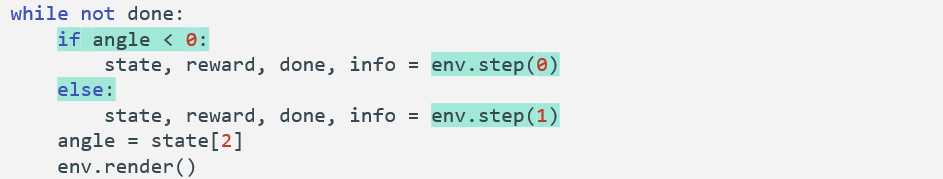

In [ ]:
env = gym.make("CartPole-v1")
display1 = Display(visible=False, size=(1500, 1000))
_ = display1.start()
test = "test.mp4"
video = VideoRecorder(env, test)


state = env.reset()
angle = state[2]

while not done:
    env.render(mode = 'rgb_array')
    video.capture_frame()

    # insert the code here

video.close()
env.close()


In [ ]:
html = render_mp4(test)
HTML(html)


Or you could try to compensate for the difference in the pole angle.  
In other words, push the pole to the left when the difference in the pole angle is negative,  
and push the pole to the right if the pole angle is positive.

Try to implement the following code: 

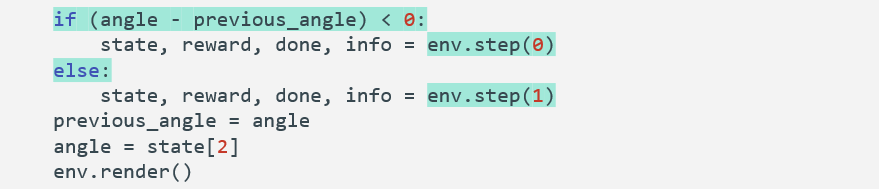

In [ ]:
env = gym.make("CartPole-v1")
display1 = Display(visible=False, size=(1500, 1000))
_ = display1.start()
angle_compensation = "angle_compensation.mp4"
video = VideoRecorder(env, angle_compensation)


state = env.reset()
previous_angle = state[2]
angle = state[2]

while not done:
    env.render(mode = 'rgb_array')
    video.capture_frame()

    # insert the code here

video.close()
env.close()

In [ ]:
html = render_mp4(angle_compensation)
HTML(html)

# <font color=deeppink> Q-learning

Let's start by importing some additional libraries

In [ ]:
import numpy as np
import math


This cell contain the parameters that were discussed earlier.

*   The learning rate
*   Epsilon
*   Epsilon decay 
*   Discount 




The number of episodes is the amount of time the environment is going to be run. 

In [ ]:
LEARNING_RATE = 0.5 # waarde tussen 0 en 1

DISCOUNT = 0.5 # waarde tussen 0 en 1
EPISODES = 1000 # kan zeer hoog (denk in grootteorde 100 000), maar probeer het eerst met een lager getal
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

epsilon = 0.5 # waarde tussen 0 en 1

epsilon_decay_value = 0.5 # Waarde tussen 0 en 1

env = gym.make("CartPole-v1")

For Q-learning, it is important that the state space is a discrete one,  
however the cart position and pole angle are continueus values.  
So let's fix this issue

In [ ]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
print(q_table.shape)

def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([12,6,1,6])
    return tuple(discrete_state.astype(np.int))

<font color=deeppink> Next step is to train the q-table

In [ ]:
import time
display = Display(visible=False, size=(1500, 1000))
_ = display.start()
q_learning = "q_learning.mp4"
video3 = VideoRecorder(env, q_learning)

for episode in range(EPISODES + 1): # go through the episodes
    t0 = time.time() # set the initial time
    discrete_state = get_discrete_state(env.reset()) #get the discrete start for the restarted environment 
    done = False
    episode_reward = 0 #reward starts as 0 for each episode

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not done: 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) #take cordinated action
        else:

            action = np.random.randint(0, env.action_space.n) #do a random action

        new_state, reward, done, _ = env.step(action) #step action to get new states, reward, and the "done" status.

        episode_reward += reward #add the reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % 1000 == 0: #render, als je meer episodes wilt doorlopen, zet je dit getal best hoger.
            env.render()
            video3.capture_frame()


        if not done: # update q-table
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: # epsilon modification
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() # episode has finished
    episode_total = t1 - t0 # episode total time
    total = total + episode_total

    total_reward += episode_reward # episode total reward
    prior_reward = episode_reward

               


video3.close()
env.close()

In [ ]:
html = render_mp4(q_learning)
HTML(html)

<font color="deepskyblue"> <font color="deepskyblue"> Huge thank you to this author who provided the base of the code for q learning  
https://medium.com/swlh/using-q-learning-for-openais-cartpole-v1-4a216ef237df